In [ ]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
warnings.filterwarnings( 'ignore' )

In [ ]:
data_customer = pd.read_csv('/content/olist_customers_dataset.csv')
data_geolocation = pd.read_csv('/content/olist_geolocation_dataset.csv')
data_orders = pd.read_csv('/content/olist_orders_dataset.csv')
data_order_items = pd.read_csv('/content/olist_order_items_dataset.csv')
data_order_payments = pd.read_csv('/content/olist_order_payments_dataset.csv')
data_order_reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')
data_products = pd.read_csv('/content/olist_products_dataset.csv')
data_sellers = pd.read_csv('/content/olist_sellers_dataset.csv')

In [ ]:
data_customer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


There are 4119 unique cities in the database.

TOP 20 cities covers 42.2 percent of all the orders.


Text(0.5, 1.0, 'TOP 20 cities')

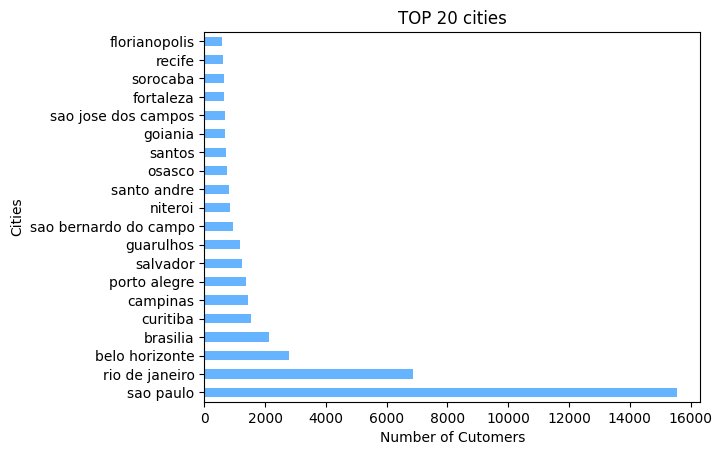

In [ ]:
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
# Grouping and plotting most frequent cities
cities = data_customer["customer_city"].nunique()
citesTop = data_customer.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False)
print("There are",cities,"unique cities in the database.")
print("\nTOP 20 cities covers", round(citesTop.head(20).sum()/data_customer.shape[0]*100,1),"percent of all the orders.")
citesTop.head(20).plot.barh( color=colors[3])
plt.ylabel("Cities")
plt.xlabel("Number of Cutomers")
plt.title("TOP 20 cities")


Most number of customers are from Sao paulo.


In [ ]:
data_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105345 entries, 0 to 105344
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_id                       105345 non-null  object
 1   customer_id                    105345 non-null  object
 2   order_status                   105345 non-null  object
 3   order_purchase_timestamp       105345 non-null  object
 4   order_approved_at              105176 non-null  object
 5   order_delivered_carrier_date   103459 non-null  object
 6   order_delivered_customer_date  102218 non-null  object
 7   order_estimated_delivery_date  105345 non-null  object
dtypes: object(8)
memory usage: 6.4+ MB


In [ ]:
orders_fmt = data_orders.copy()
orders_fmt["order_purchase_timestamp"] = pd.to_datetime(data_orders["order_purchase_timestamp"], format='%Y-%m-%d %H:%M:%S', errors='coerce')
orders_fmt["order_delivered_carrier_date"] = pd.to_datetime(data_orders["order_delivered_carrier_date"], format='%Y-%m-%d %H:%M:%S', errors='coerce')
orders_fmt["order_delivered_customer_date"] = pd.to_datetime(data_orders["order_delivered_customer_date"], format='%Y-%m-%d %H:%M:%S', errors='coerce')
orders_fmt["order_estimated_delivery_date"] = pd.to_datetime(data_orders["order_estimated_delivery_date"], format='%Y-%m-%d %H:%M:%S', errors='coerce')

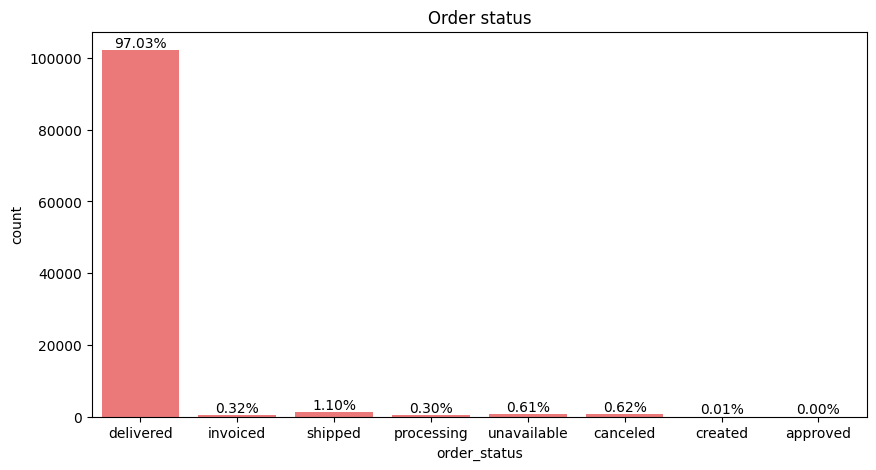

In [ ]:
# Bar graph with annotations
plt.figure(figsize=(10, 5))
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
plots = sns.countplot(x="order_status", data=data_orders , color=colors[0])

for bar in plots.patches:
    plots.annotate(format(((bar.get_height()/len(data_orders['order_status'])*100)), '.2f')+"%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

plt.title("Order status")
plt.show()


Most products are delivered but still there are 3% which were under processed, cancelled, unavailable. They were not delivered.

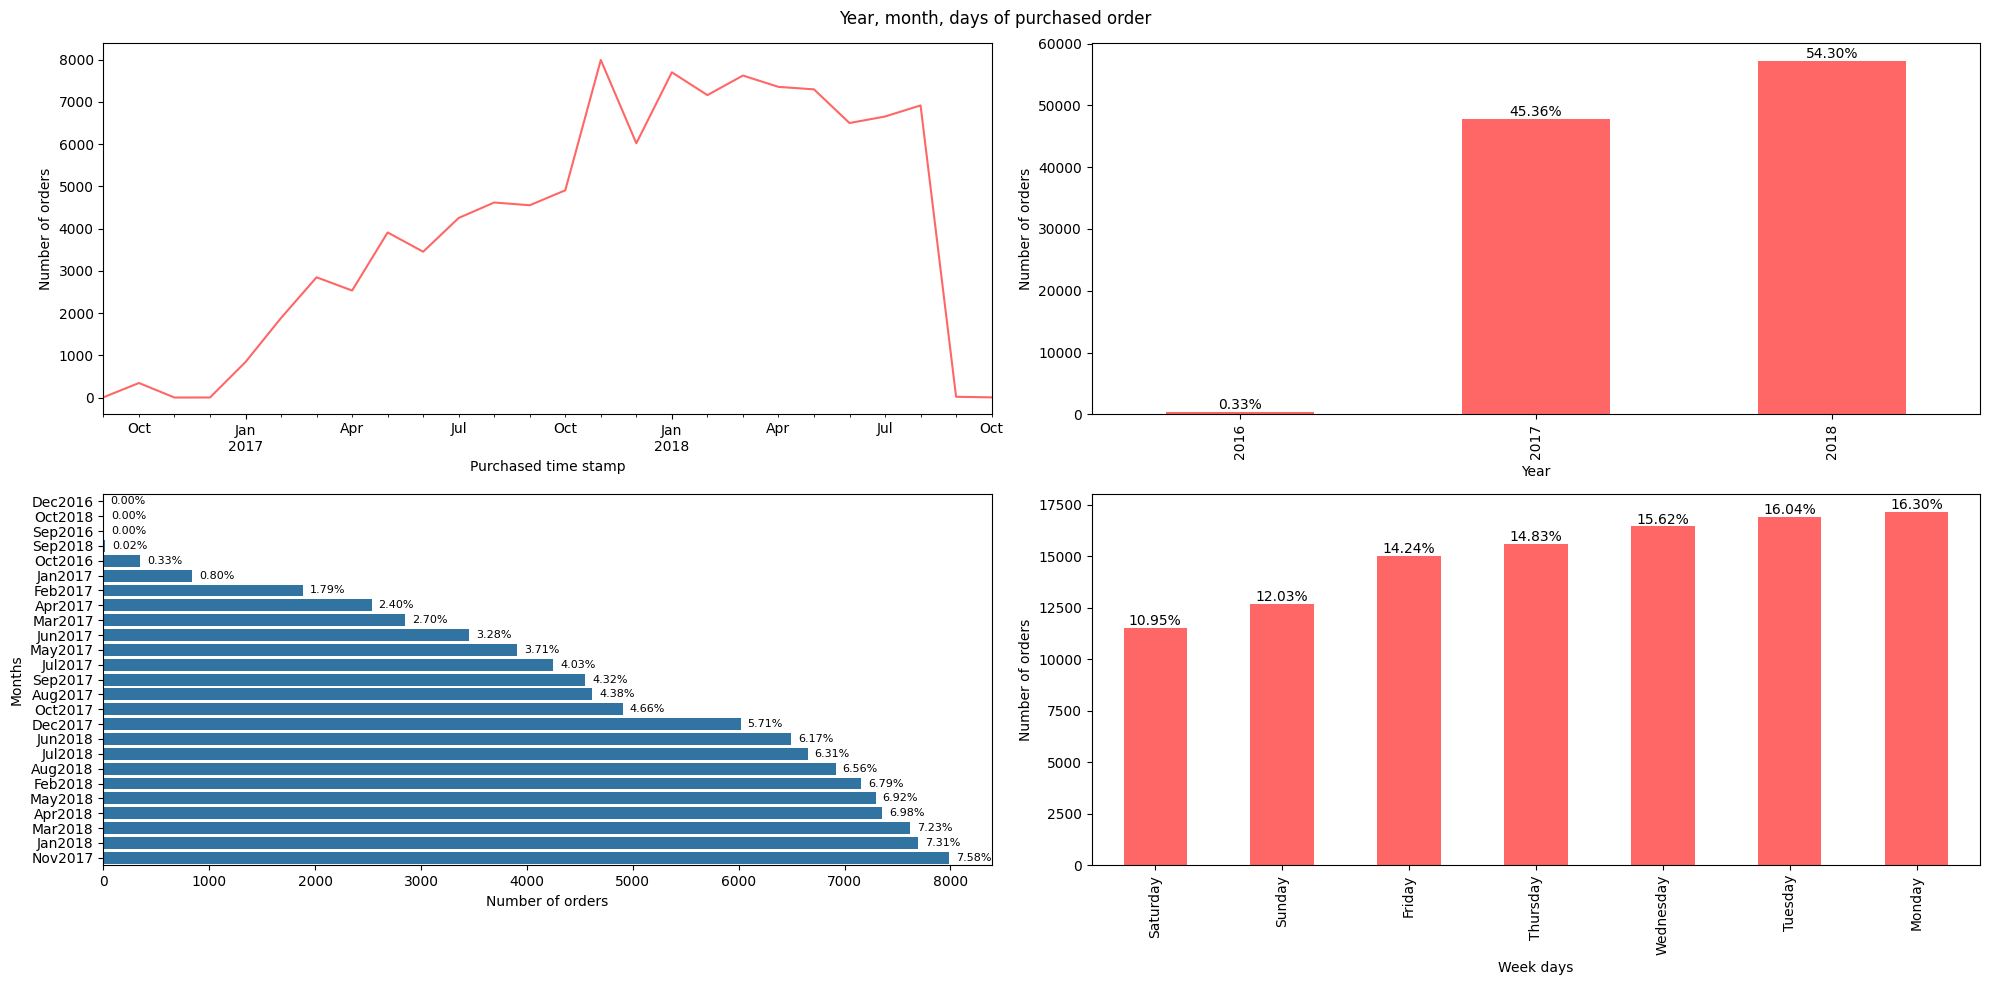

In [ ]:
fig, ax= plt.subplots(2, 2, figsize=(20,10), tight_layout=True)
fig.suptitle("Year, month, days of purchased order")
# line chart for all over purchase timestamp
counts = orders_fmt.set_index("order_purchase_timestamp").groupby(pd.Grouper(freq='M')).count()
counts.plot(y = "order_id", color=colors[0], legend=False, ax=ax[0][0])
ax[0][0].set_xlabel("Purchased time stamp")
ax[0][0].set_ylabel("Number of orders")

# order purchased thorugh years
orders_fmt['Year'] = orders_fmt['order_purchase_timestamp'].dt.year
barPlot = orders_fmt.groupby('Year').size().plot(kind = 'bar', ax=ax[0][1], color='#ff6666')
ax[0][1].set_ylabel("Number of orders")
ax[0][1].set_xlabel("Year")
for bar in barPlot.patches:
    barPlot.annotate(format(((bar.get_height()/len(orders_fmt['Year'])*100)), '.2f')+"%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

# order purchased through months
orders_fmt['month'] = orders_fmt['order_purchase_timestamp'].dt.strftime('%b%Y')
barPlot2 = sns.barplot(y=orders_fmt.groupby('month').size().sort_values().index, x=orders_fmt.groupby('month').size().sort_values().values, ax=ax[1][0])
ax[1][0].set_xlabel("Number of orders")
ax[1][0].set_ylabel("Months")
for p in barPlot2.patches:
    barPlot2.annotate(format(((p.get_width()/len(orders_fmt['month'])*100)), '.2f')+"%", xy=(p.get_width(), p.get_y()+p.get_height()/2),xytext=(5, 0), textcoords='offset points', ha="left", va="center",fontsize=8)

#order purchased through weekdays
orders_fmt['weekdays'] = orders_fmt['order_purchase_timestamp'].dt.day_name()
barPlot3 = orders_fmt.groupby('weekdays').size().sort_values().plot(kind = 'bar', ax=ax[1][1], color='#ff6666')
ax[1][1].set_ylabel("Number of orders")
ax[1][1].set_xlabel("Week days")
for bar in barPlot3.patches:
    barPlot3.annotate(format(((bar.get_height()/len(orders_fmt['weekdays'])*100)), '.2f')+"%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

plt.show()

Text(0.5, 1.0, 'Orders by Time of the Day')

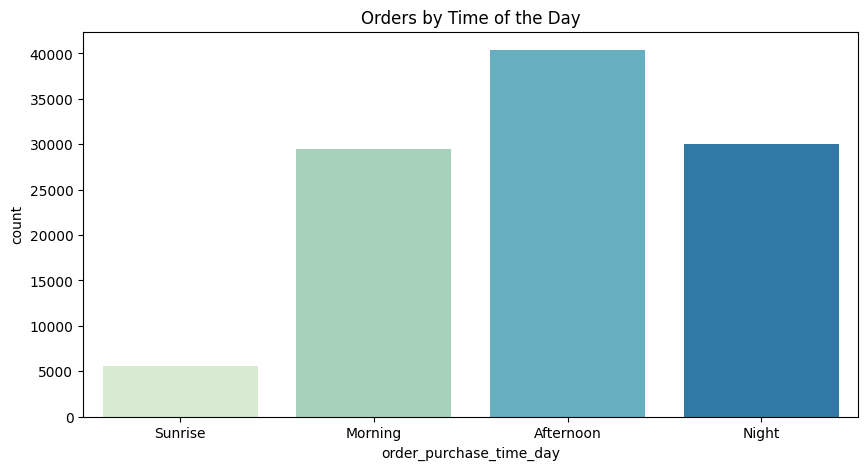

In [ ]:
orders_fmt['order_purchase_hour'] = orders_fmt['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Sunrise', 'Morning', 'Afternoon', 'Night']
orders_fmt['order_purchase_time_day'] = pd.cut(orders_fmt['order_purchase_hour'], hours_bins, labels=hours_labels)

plt.figure(figsize=(10, 5))
sns.countplot(x="order_purchase_time_day", data=orders_fmt, palette="GnBu")
plt.title("Orders by Time of the Day")

<Axes: title={'center': 'Number of orders delivered late'}, ylabel='Number of orders'>

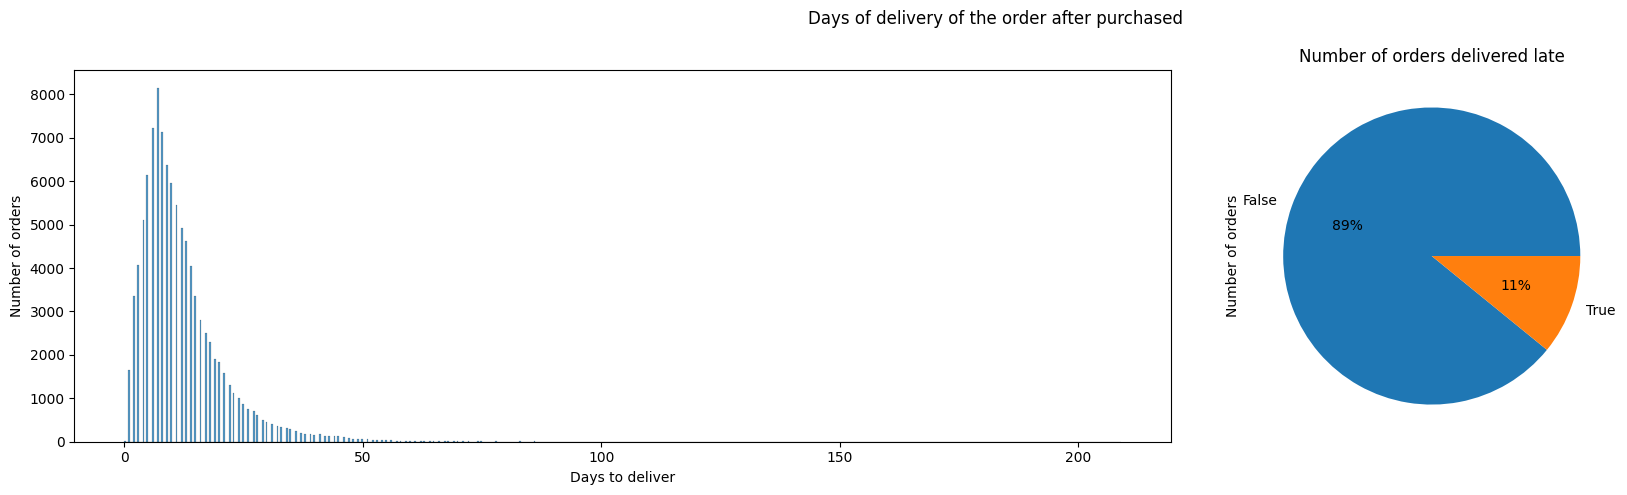

In [ ]:
fig, ax= plt.subplots(1, 2, figsize=(20,5), tight_layout=True)
fig.suptitle('Days of delivery of the order after purchased')
#  comparing the dates of purchased and delivered
orders_fmt['day_to_delivery']=(orders_fmt['order_delivered_customer_date']-orders_fmt['order_purchase_timestamp']).dt.days
# comparing the estimated delivery time and actual delivery time
orders_fmt['delivery'] = (orders_fmt['order_estimated_delivery_date']-orders_fmt['order_delivered_customer_date']).dt.days
orders_fmt['late_delivery'] = np.where(orders_fmt['delivery'] >= 0, False, True)

# days to deliver
sns.histplot(data= orders_fmt, x= 'day_to_delivery', ax=ax[0])
ax[0].set_xlabel("Days to deliver")
ax[0].set_ylabel("Number of orders")

# the delivery is late or not
orders_fmt.groupby(['late_delivery']).size().plot(kind='pie',ylabel='Number of orders', autopct='%1.0f%%', title='Number of orders delivered late', ax=ax[1])

In [ ]:
data_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


<Axes: title={'center': 'Type of payments'}>

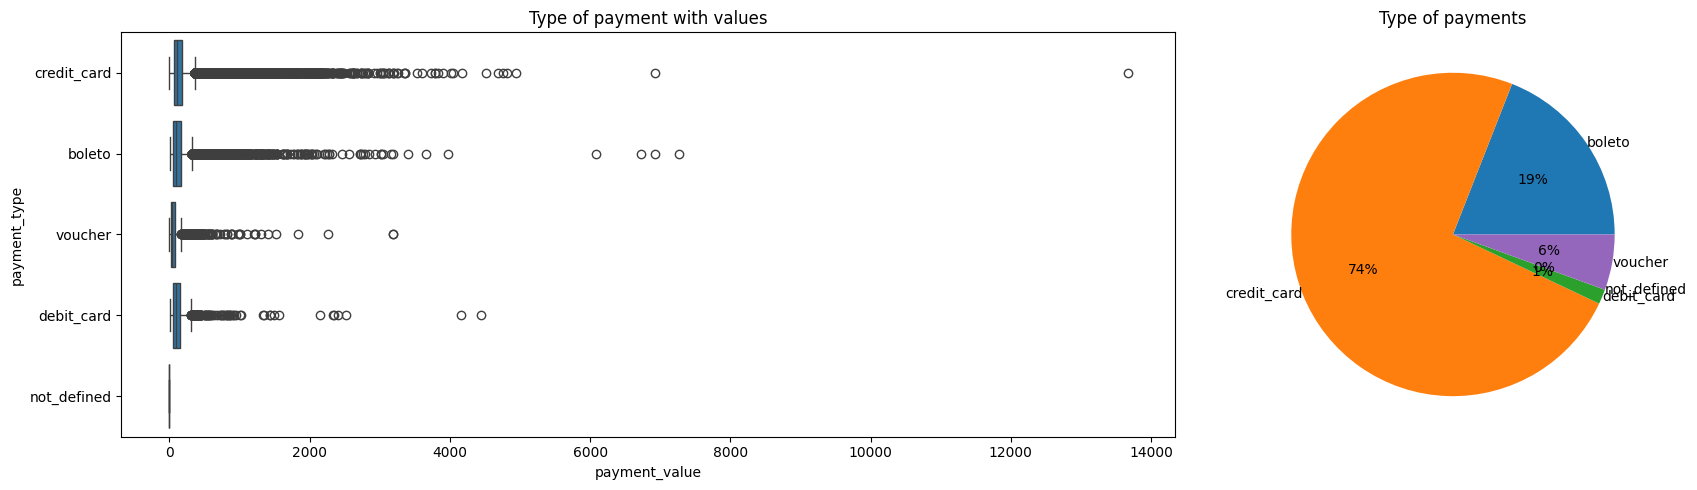

In [ ]:
fig, ax= plt.subplots(1, 2, figsize=(20,5), tight_layout=True)

sns.boxplot(data=data_order_payments, x="payment_value", y="payment_type", ax=ax[0])
ax[0].set_title("Type of payment with values")

data_order_payments.groupby(['payment_type']).size().plot(kind='pie', autopct='%1.0f%%', title='Type of payments', ax=ax[1], labeldistance=1)

Text(0.5, 1.0, 'Number of payment installments')

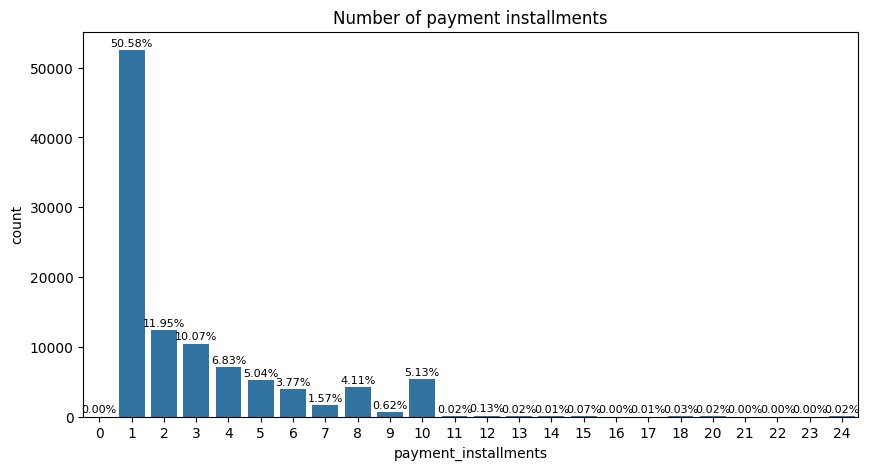

In [ ]:
plt.figure(figsize=(10, 5))
plot = sns.countplot(data=data_order_payments, x="payment_installments")
for bar in plot.patches:
    plot.annotate(format(((bar.get_height()/len(data_order_payments['payment_installments'])*100)), '.2f')+"%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 5),
                   textcoords='offset points')
plt.title("Number of payment installments")

In [ ]:
data_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


<Axes: title={'center': 'Review score'}>

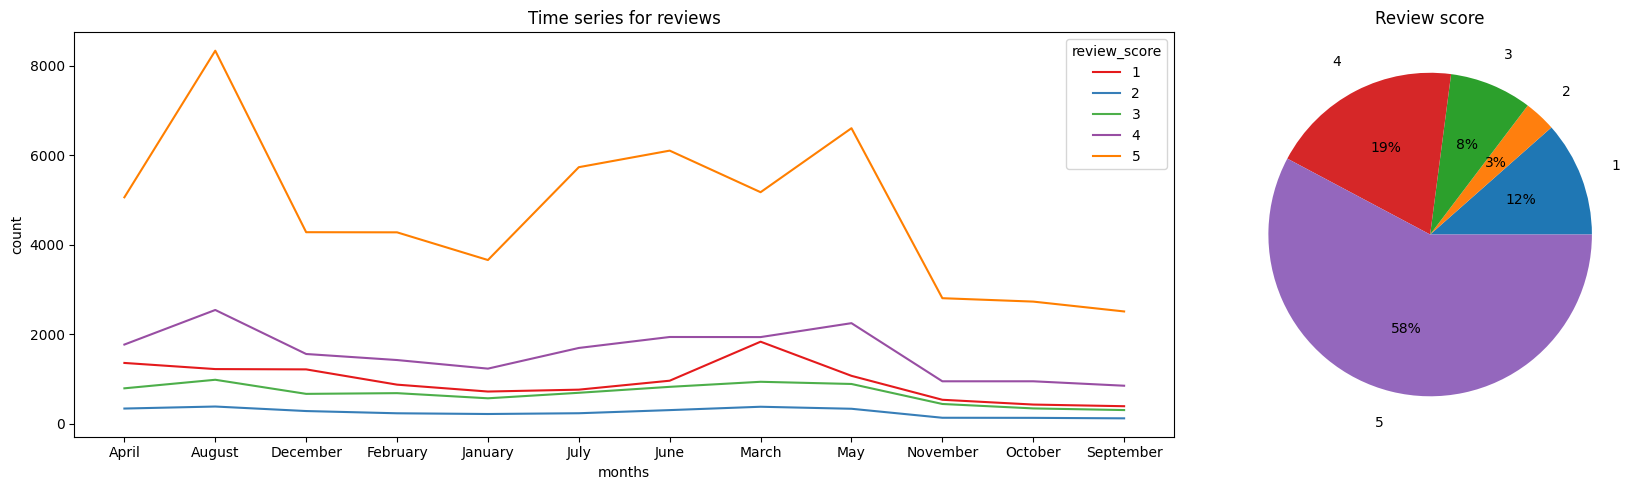

In [ ]:
datacheck = data_order_reviews.copy()
datacheck['review_creation_date'] = pd.to_datetime(data_order_reviews['review_creation_date'], format='%Y-%m-%d %H:%M:%S')
datacheck["months"] = datacheck['review_creation_date'].dt.month_name()



fig, ax= plt.subplots(1, 2, figsize=(20,5), tight_layout=True)

sns.lineplot( data=datacheck.groupby(['months'], as_index=False)['review_score'].value_counts(),  x='months', y='count', hue= 'review_score', palette='Set1', ax=ax[0])
ax[0].set_title("Time series for reviews")

datacheck.groupby(['review_score']).size().plot(kind='pie', autopct='%1.0f%%', title='Review score', ax=ax[1], labeldistance=1.2)

In [ ]:
data_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Text(0.5, 1.0, 'Product category')

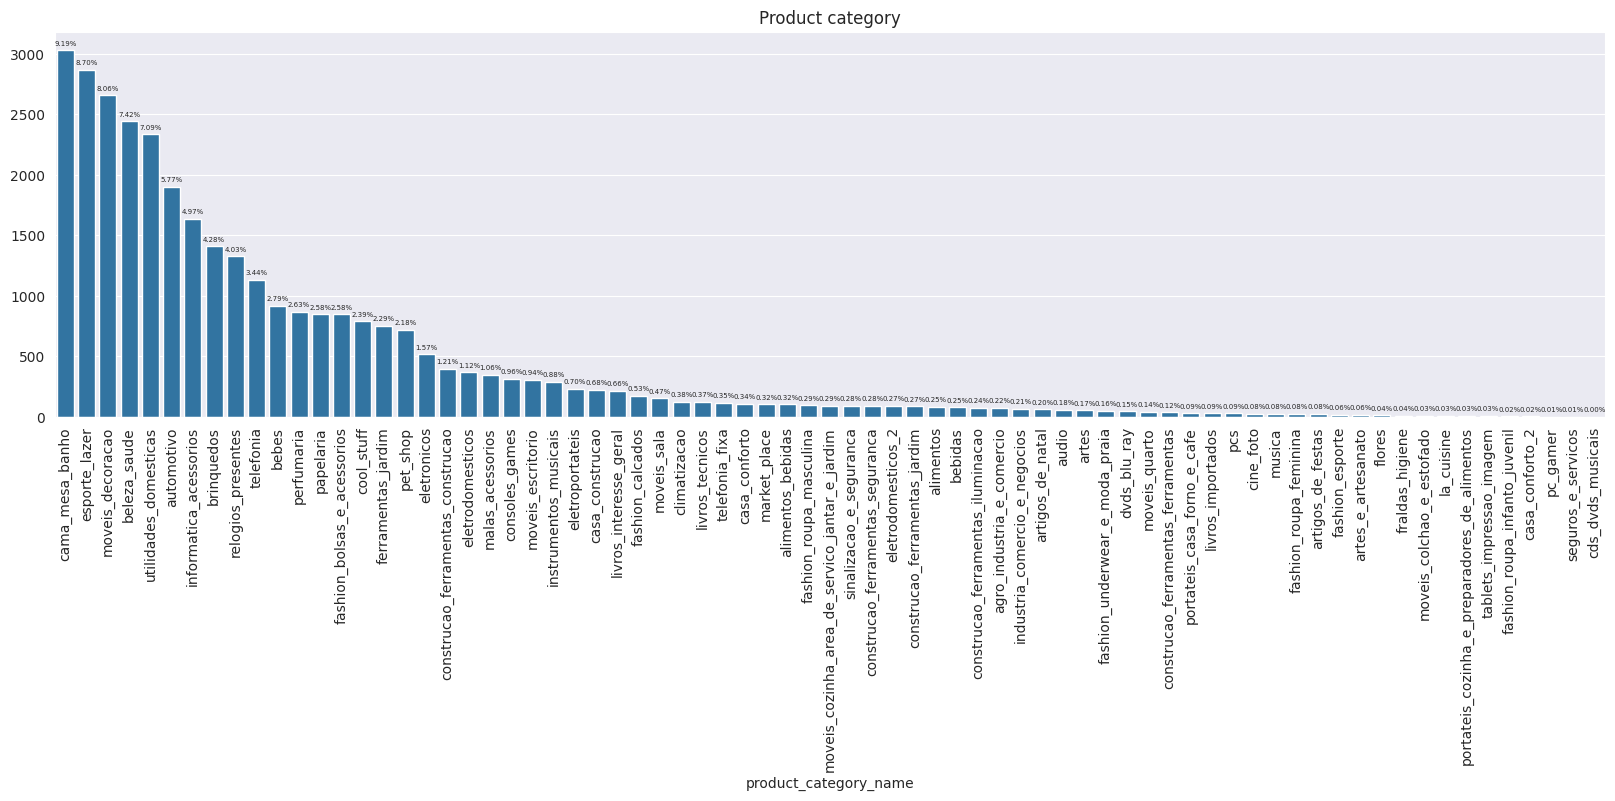

In [ ]:
top_10_category = data_products["product_category_name"].value_counts().sort_values(ascending=False)

fig=plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
plot=sns.barplot(x=top_10_category.index, y=top_10_category.values)
for bar in plot.patches:
    plot.annotate(format(((bar.get_height()/len(data_products["product_category_name"]))*100), '.2f')+"%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=5, xytext=(0, 5),
                   textcoords='offset points')
plt.xticks(rotation=90)
plt.title('Product category')

In [ ]:
data_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Text(0, 0.5, 'No. of Sellers')

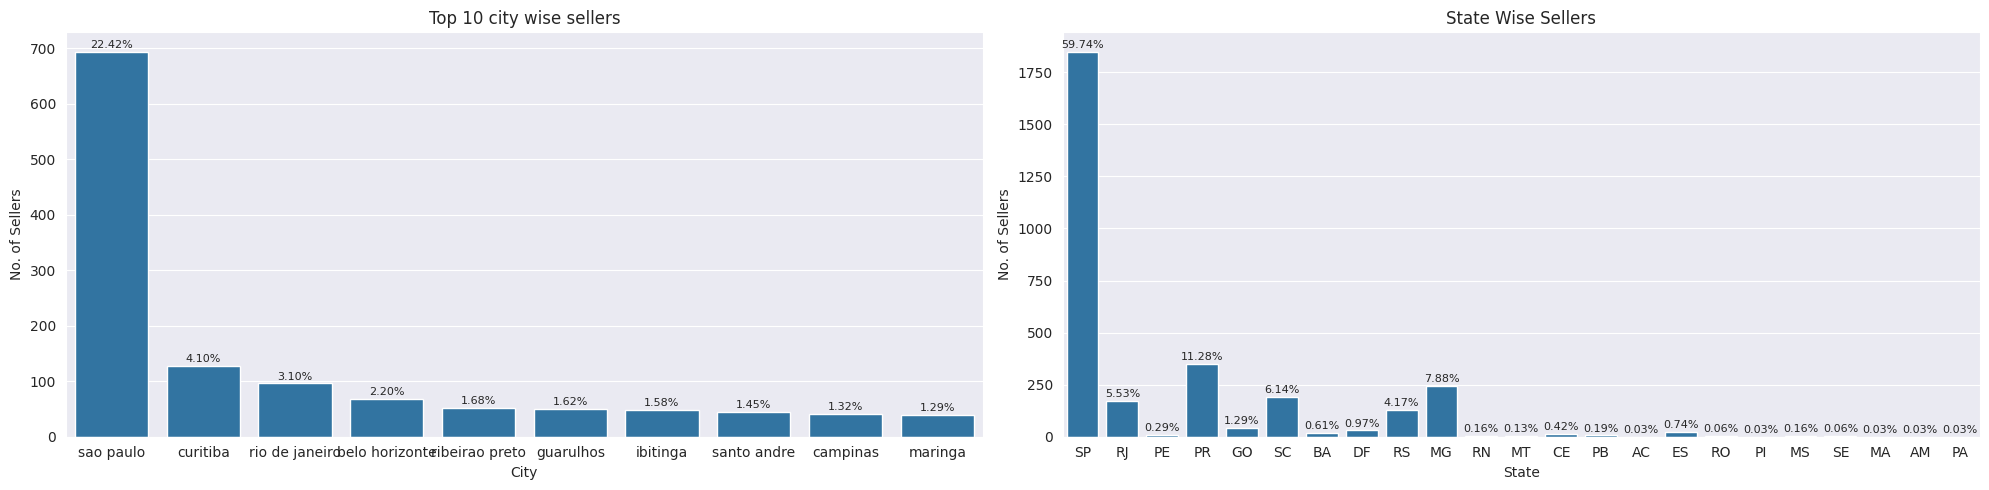

In [ ]:
fig, ax= plt.subplots(1, 2, figsize=(20,5), tight_layout=True)

sellercity = data_sellers["seller_city"].value_counts().sort_values(ascending=False)[:10]

plot1 = sns.barplot(x=sellercity.index, y=sellercity.values,ax=ax[0])
for bar in plot1.patches:
    plot1.annotate(format(((bar.get_height()/len(data_sellers["seller_city"]))*100), '.2f')+"%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 5),
                   textcoords='offset points')
ax[0].set_title('Top 10 city wise sellers')
ax[0].set_xlabel('City')
ax[0].set_ylabel('No. of Sellers')


plot2 = sns.countplot(x='seller_state', data=data_sellers, ax=ax[1])
for bar in plot2.patches:
    plot2.annotate(format(((bar.get_height()/len(data_sellers["seller_city"]))*100), '.2f')+"%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 5),
                   textcoords='offset points')
ax[1].set_title('State Wise Sellers')
ax[1].set_xlabel('State')
ax[1].set_ylabel('No. of Sellers')

In [ ]:
data_train = data_orders.merge(data_customer, on="customer_id").merge(data_order_items, on="order_id").merge(data_products, on="product_id").merge(data_order_payments, on="order_id").merge(data_sellers, on="seller_id").merge(data_order_reviews, on="order_id")

data_geolocation['customer_zip_code_prefix'] = data_geolocation['geolocation_zip_code_prefix']
geol = data_geolocation.groupby(['customer_zip_code_prefix'],as_index=False).agg({
  'geolocation_lat':'mean',
  'geolocation_lng':'mean'
})
data_train = data_train.merge(geol,how='left',on='customer_zip_code_prefix')
data_train.shape

(124299, 41)

In [ ]:
data_train.describe().round(2)

,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix,review_score,geolocation_lat,geolocation_lng
count,124299.00,124299.00,124299.00,124299.00,122498.00,122498.00,122498.00,124276.00,124276.00,124276.00,124276.00,124299.00,124299.00,124299.00,124299.00,124299.00,123965.00,123965.00
mean,35046.96,1.19,120.82,20.05,48.76,786.64,2.21,2114.49,30.27,16.62,23.07,1.10,2.94,172.20,24477.45,4.03,-21.23,-46.20
std,29830.73,0.68,184.18,15.88,10.05,652.89,1.72,3792.55,16.20,13.47,11.78,0.74,2.78,264.45,27611.84,1.39,5.57,4.05
min,1003.00,1.00,0.85,0.00,5.00,4.00,1.00,0.00,7.00,2.00,6.00,1.00,0.00,0.00,1001.00,1.00,-33.69,-72.67
25%,11310.00,1.00,39.90,13.08,42.00,347.00,1.00,300.00,18.00,8.00,15.00,1.00,1.00,60.85,6429.00,4.00,-23.59,-48.11
50%,24240.00,1.00,74.90,16.29,52.00,601.00,1.00,700.00,25.00,13.00,20.00,1.00,2.00,108.07,13660.00,5.00,-22.93,-46.63
75%,58704.00,1.00,134.90,21.19,57.00,985.00,3.00,1800.00,38.00,20.00,30.00,1.00,4.00,189.08,28605.00,5.00,-20.18,-43.62
max,99990.00,21.00,6735.00,409.68,76.00,3992.00,20.00,40425.00,105.00,105.00,118.00,29.00,24.00,13664.08,99730.00,5.00,42.18,-8.72


In [ ]:
# Function to calculate missing values by column
def missing_values(df):
        # Total missing values
        mis_val = df.isnull().sum()
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("The dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

missing_values(data_train)

The dataframe has 41 columns.
There are 15 columns that have missing values.


,Missing Values,% of Total Values
review_comment_title,109611,88.2
review_comment_message,71725,57.7
order_delivered_customer_date,2595,2.1
product_category_name,1801,1.4
product_name_lenght,1801,1.4
product_description_lenght,1801,1.4
product_photos_qty,1801,1.4
order_delivered_carrier_date,1301,1.0
geolocation_lat,334,0.3
geolocation_lng,334,0.3


In [ ]:
data_missing_columns = data_train.columns.drop(['review_comment_title', "review_comment_message", 'order_id', 'customer_id', 'product_id','customer_unique_id', 'order_item_id', 'seller_id', 'review_id'])

# select numerical columns
numerical_col_train = data_train[data_missing_columns].select_dtypes(include=[np.number]).columns

# Numercial missing value imputation
imputer  = IterativeImputer(max_iter=25, random_state=0)
imputed = imputer.fit_transform(data_train[numerical_col_train])
data_train[numerical_col_train] = pd.DataFrame(imputed, columns=numerical_col_train)

# # Selecting the categorical variables
categorical_col_train = data_train[data_missing_columns].select_dtypes(exclude=[np.number]).columns

# Categorical missing value imputation
imputerSimple = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
data_train[categorical_col_train] = imputerSimple.fit_transform(data_train[categorical_col_train])

In [ ]:
imputerSimpleReview = SimpleImputer(strategy='constant', fill_value='')
data_train.loc[:,['review_comment_title', 'review_comment_message']] = imputerSimpleReview.fit_transform(data_train.loc[:,['review_comment_title', 'review_comment_message']])

In [ ]:
missing_values(data_train)

The dataframe has 41 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
print("The total number of duplicate rows are" , data_train.duplicated().sum())

The total number of duplicate rows are 6969


In [ ]:
time_sol = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date','shipping_limit_date',
       'review_creation_date', 'review_answer_timestamp',]
#changing the date object to pandas time format
for t in time_sol:
    data_train[t] =  pd.to_datetime(data_train[t], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [ ]:
data_train[time_sol]

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,review_creation_date,review_answer_timestamp
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:15,2017-10-11,2017-10-12 03:43:48
1,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:15,2017-10-11,2017-10-12 03:43:48
2,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:15,2017-10-11,2017-10-12 03:43:48
3,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:27,2018-08-08,2018-08-08 18:37:50
4,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:23,2018-08-18,2018-08-22 19:07:58
...,...,...,...,...,...,...,...,...
124294,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018-02-12 13:10:37,2018-03-01,2018-03-02 17:50:01
124295,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-09-05 15:04:16,2017-09-22,2017-09-22 23:10:57
124296,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-01-12 21:36:21,2018-01-26,2018-01-27 09:16:56
124297,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-01-12 21:36:21,2018-01-26,2018-01-27 09:16:56


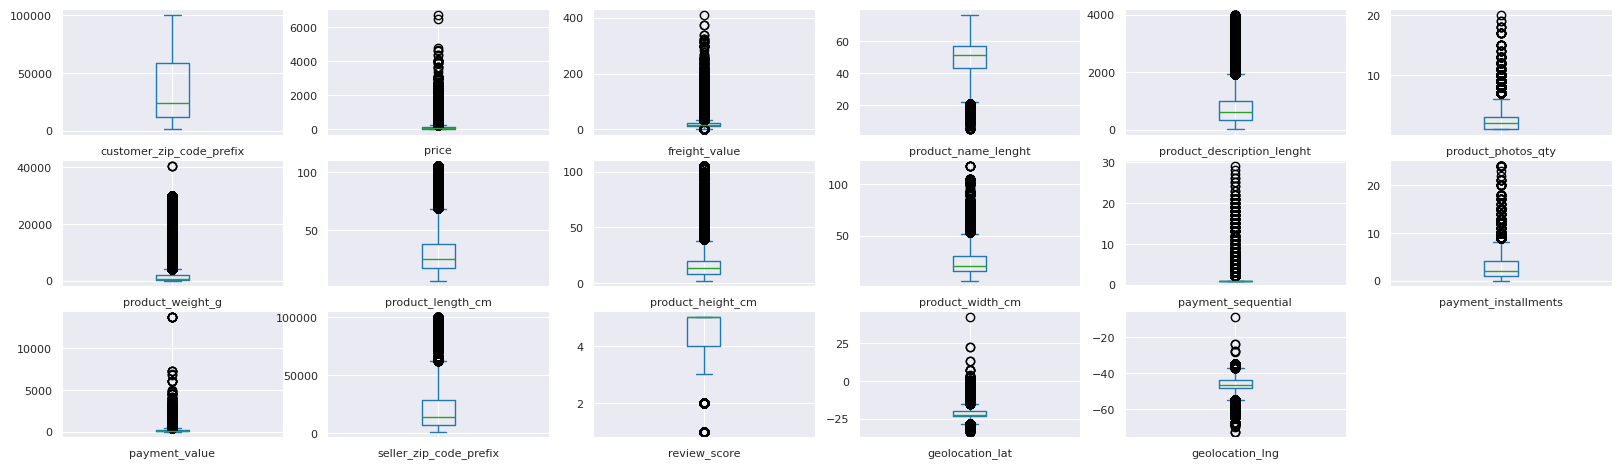

In [ ]:
data_train.select_dtypes(include=["float64"]).plot(kind='box', subplots=True, figsize=(20,35), layout=(18,6), fontsize=8)
plt.title('Before treating outliers')
plt.show()

In [ ]:
for col in data_train.select_dtypes(include=["float64"]).columns:
    q1_col = data_train[col].quantile(0.025)
    q3_col = data_train[col].quantile(0.975)
    data_train[col] = np.where((data_train[col] > q3_col), q3_col, data_train[col])

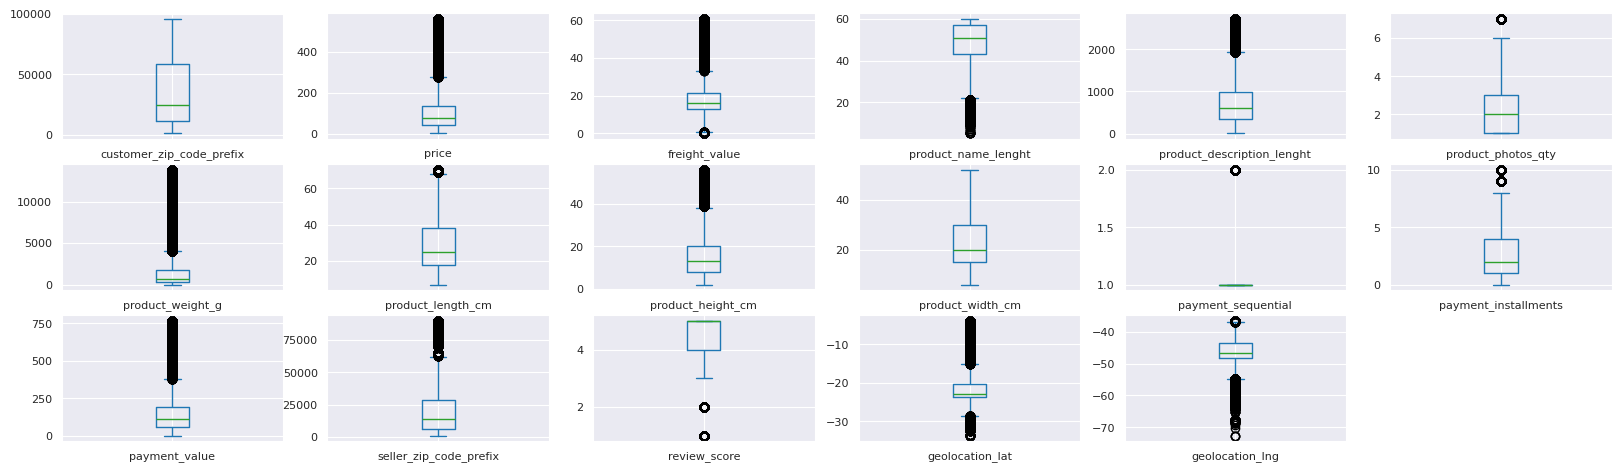

In [ ]:
data_train.select_dtypes(include=["float64"]).plot(kind='box', subplots=True, figsize=(20,35), layout=(18,6), fontsize=8)
plt.title('After treating outliers')
plt.show()

# Feature engineering

Creating new features
* delivery days - How much days it took to deliver the product (item purchase date - date of delivery)
* late delivery - Is the delivered item late or not(item estmiated delivery date > actual date of delivery)
* Order freight ratio - ratio of freight value (Transportantion) to that of product value.
* Total order value - order products value and freight_value.
* Day of order - What is the day of week the order was placed
* Approval time (mins) - Time taken by Olist’s system to approve an order after an order has been placed and before it’s intimated to supplier/carrier.
* Customer orders - How many unique orders does each customer have
* Date of purchase - what date customer purchased the item
* Time of purchase - at what time of a day the customer are purchasing the item
* Length of comments - number od characters in the comments of the review by customers
* Number of comments - count of the comment posted by individual customers

In [ ]:
data_train['delivery_days'] = (data_train['order_estimated_delivery_date']-data_train['order_delivered_customer_date']).dt.days

data_train['late_delivery'] = np.where(data_train['delivery_days'] >= 0, 0, 1)

data_train['freight_ratio'] = data_train['freight_value'] / data_train['payment_value']

data_train['total_order_value'] = data_train['payment_value'] + data_train['freight_value']

data_train['order_weekday'] = data_train['order_purchase_timestamp'].dt.weekday

data_train['approval_time_min'] = (data_train['order_approved_at']-data_train['order_purchase_timestamp']).dt.total_seconds()/60

data_train['length_reviews_comment'] = data_train['review_comment_message'].map(len)

data_train['count_comment'] = pd.Series([1 if x >0 else 0 for x in data_train['review_comment_message'].map(len)])
data_train['number_reviews'] = data_train.groupby('customer_unique_id').count_comment.transform('nunique')

data_train.drop('count_comment', axis=1, inplace=True)



hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Sunrise', 'Morning', 'Afternoon', 'Night']
data_train['purchase_time_day'] = pd.cut(data_train['order_purchase_timestamp'].apply(lambda x: x.hour), hours_bins, labels=hours_labels)

In [ ]:
# droping the columns from which we extrated the information(features)
data_train.drop(['order_approved_at', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date'], axis=1, inplace=True)

In [ ]:
data_train.shape

(124299, 46)

# RFM ANALYSIS


Recency, frequency, monetary value (RFM) is a model used in marketing analysis that segments a company's consumer base by their purchasing patterns or habits.

Recency: How recently has the customer made a transaction.
Frequency: How frequent is the customer in ordering/buying.
Monetary: How much does the customer spend on purchasing products.

In [ ]:
# Recency
data_rfm = data_train.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
recent_date = data_train['order_purchase_timestamp'].dt.date.max() # Recent date of order
data_rfm['Recency'] = data_rfm["order_purchase_timestamp"].dt.date.apply(lambda x: (recent_date - x).days)
data_rfm

# Frequency
data_rfm['Frequency'] = data_train.groupby('customer_unique_id')['order_id'].transform('nunique')

# Monetry
data_rfm['Monetary'] = data_train.groupby('customer_unique_id', as_index=False)['payment_value'].sum()['payment_value']

data_rfm

,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116,2,141.900
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119,2,27.190
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542,2,86.220
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326,1,43.620
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293,1,196.890
...,...,...,...,...,...
94715,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,452,1,1531.016
94716,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,267,1,84.580
94717,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,573,1,112.460
94718,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,124,1,133.690


In [ ]:
data_rfm.describe().T

,count,mean,min,25%,50%,75%,max,std
order_purchase_timestamp,94720,2018-01-03 07:09:09.244467968,2016-09-04 21:15:19,2017-09-15 23:22:18.500000,2018-01-22 17:09:20.500000,2018-05-07 12:49:25,2018-09-03 09:06:57,NaN
Recency,94720.0,243.338967,0.0,119.0,224.0,353.0,729.0,153.164273
Frequency,94720.0,1.088619,1.0,1.0,1.0,1.0,16.0,0.400331
Monetary,94720.0,207.630252,9.59,65.48,117.145,213.9225,18372.192,361.960309


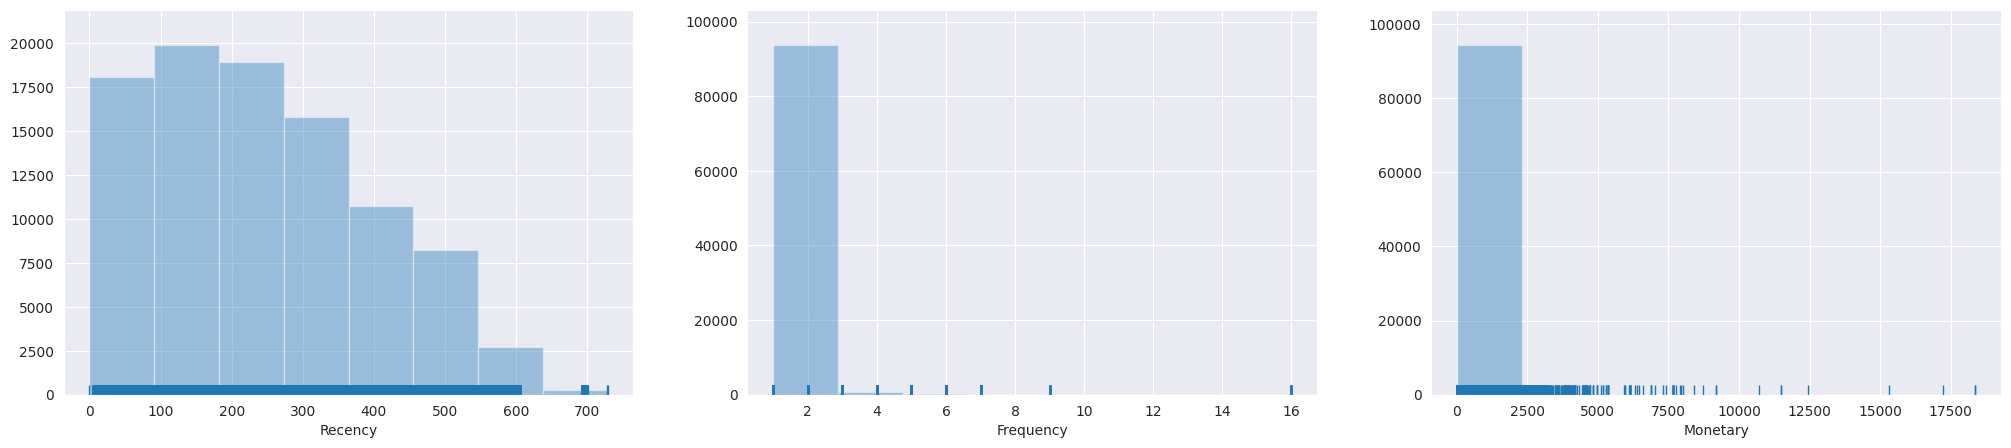

In [ ]:
plt.figure(figsize=(25, 5))
plt.subplot(1, 3, 1); sns.distplot(data_rfm['Recency'], bins=8,kde=False,rug=True)
plt.subplot(1, 3, 2); sns.distplot(data_rfm['Frequency'], bins=8,kde=False,rug=True)
plt.subplot(1, 3, 3); sns.distplot(data_rfm['Monetary'], bins=8,kde=False,rug=True)
plt.show()

* Recency - The concentration of customer is high in last 300-400 days, ie in the year.
* Frequency - Customers who order 1 or 2 times are more and then we see who orders more times.
* Monetary - Customers spending is mostly around 2000 Brazilian Real.

<Axes: >

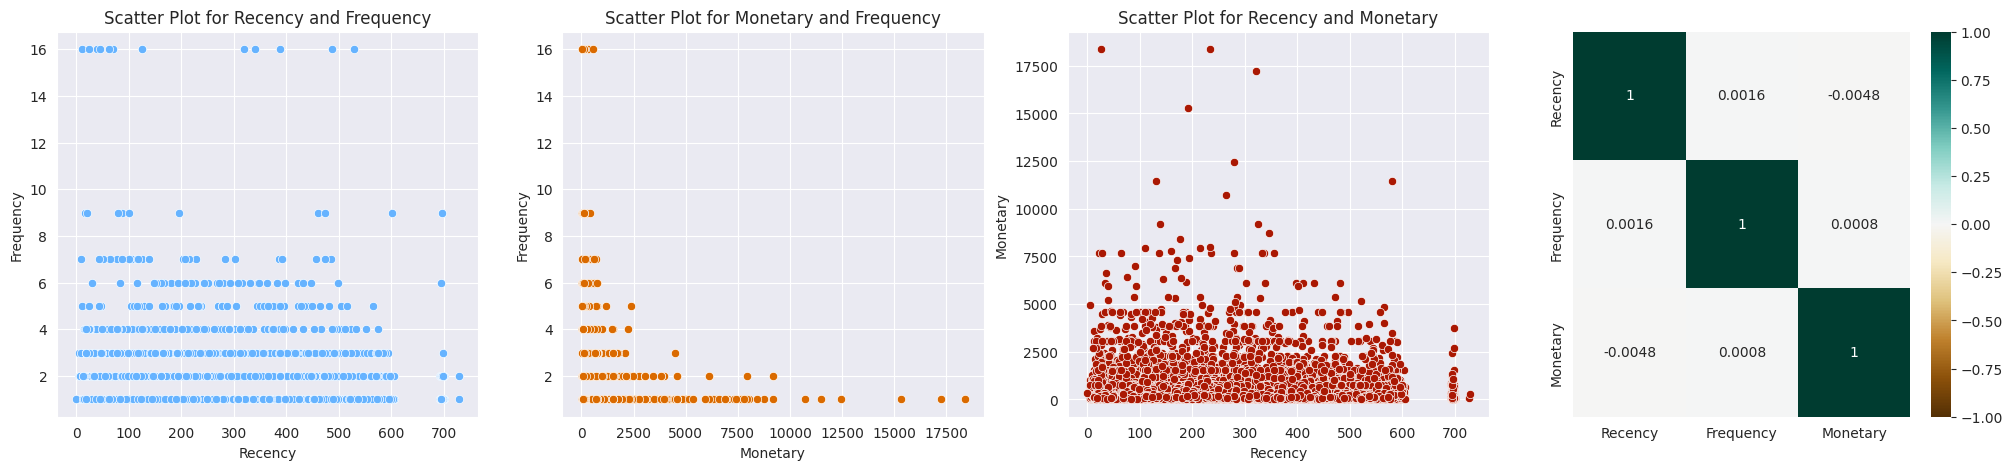

In [ ]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 4, 1)
sns.scatterplot(x=data_rfm['Recency'], y=data_rfm['Frequency'], color="#66b3ff")
plt.title('Scatter Plot for Recency and Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

plt.subplot(1, 4, 2)
sns.scatterplot(x=data_rfm['Monetary'], y=data_rfm['Frequency'], color="#DA6A00")
plt.title('Scatter Plot for Monetary and Frequency')
plt.xlabel('Monetary')
plt.ylabel('Frequency')


plt.subplot(1, 4, 3)
sns.scatterplot(x=data_rfm['Recency'], y=data_rfm['Monetary'], color="#AA1803")
plt.title('Scatter Plot for Recency and Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')

plt.subplot(1, 4, 4)
sns.heatmap(data_rfm[['Recency', 'Frequency', 'Monetary']].corr(), vmin=-1, vmax=1, annot=True, cmap="BrBG")
# g = sns.PairGrid(data_rfm[['Recency', 'Frequency', 'Monetary']], diag_sharey=False)
# g.map(sns.scatterplot)
# g.fig.set_size_inches(10,10)
# g.fig.tight_layout()

# ranking customer

In [ ]:
data_rfm["recency_score"]  = pd.qcut(data_rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
data_rfm["frequency_score"]= pd.qcut(data_rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
data_rfm["monetary_score"] = pd.qcut(data_rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

data_rfm['score_rfm'] = data_rfm.recency_score.astype(str)+ data_rfm.frequency_score.astype(str) + data_rfm.monetary_score.astype(str)
data_rfm.head(10)

,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,score_rfm,Segments
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116,2,141.90,4,5,3,453,Potential Loyalist
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119,2,27.19,4,5,1,451,Potential Loyalist
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542,2,86.22,1,5,2,152,At Risk
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326,1,43.62,2,1,1,211,Hibernating customers
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293,1,196.89,2,1,4,214,Cannot Lose Them
5,0004bd2a26a76fe21f786e4fbd80607f,2018-04-05 19:33:16,151,1,166.98,4,1,4,414,Promising
6,00050ab1314c0e55a6ca13cf7181fecf,2018-04-20 12:57:23,136,1,35.38,4,1,1,411,New Customers
7,00053a61a98854899e70ed204dd4bafe,2018-02-28 11:15:41,187,1,1676.72,3,1,5,315,Promising
8,0005e1862207bf6ccc02e4228effd9a0,2017-03-04 23:32:12,548,1,150.12,1,1,4,114,Cannot Lose Them
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2018-03-12 15:22:12,175,1,129.76,4,1,3,413,Promising


# RFM SEGMENTATION

[REFERENSI RFM SEGMENTATION](https://connectif.ai/en/blog/what-are-rfm-scores-and-how-to-calculate-them/#:~:text=RFM%20is%20a%20marketing%20technique,targets%20and%20increase%20conversion%20rates.)

RFM segmentation is especially useful for eCommerce platforms, as it allows the company to identify different customer segments based on their actual behavior and to implement more profitable strategies.

In [ ]:
seg_map= {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers',
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

In [ ]:
data_rfm['Segments'] = data_rfm['score_rfm'].replace(seg_map, regex=True)
data_rfm.head()

,customer_unique_id,order_purchase_timestamp,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,score_rfm,Segments
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116,2,141.90,4,5,3,453,Potential Loyalist
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119,2,27.19,4,5,1,451,Potential Loyalist
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542,2,86.22,1,5,2,152,At Risk
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326,1,43.62,2,1,1,211,Hibernating customers
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293,1,196.89,2,1,4,214,Cannot Lose Them


In [ ]:
data_rfm.groupby('Segments', as_index=False).agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary': "mean"
})

,Segments,Recency,Frequency,Monetary
0,About To Sleep,283.096736,1.060061,54.274934
1,At Risk,392.771772,1.120123,288.100305
2,Cannot Lose Them,440.260559,1.108580,343.367132
3,Champions,90.408767,1.257900,444.173723
4,Hibernating customers,347.250658,1.000000,83.094687
5,Lost customers,480.689458,1.070491,46.272968
6,Loyal,181.975888,1.110652,388.624709
7,Need Attention,160.518099,1.000000,271.981718
8,New Customers,127.739684,1.000000,55.089568
9,Potential Loyalist,135.885131,1.163862,78.257356


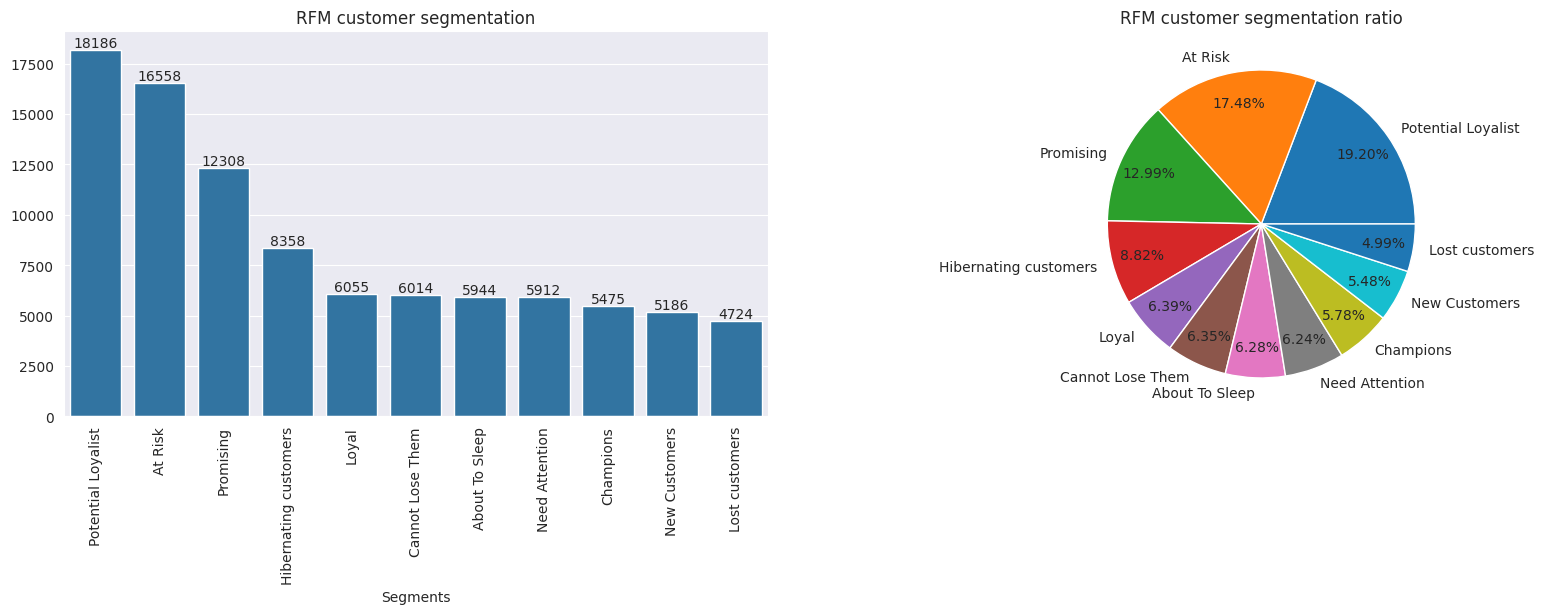

In [ ]:
fig=plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plotSegment=sns.barplot(x=data_rfm['Segments'].value_counts().index, y=data_rfm['Segments'].value_counts().values)
for bar in plotSegment.patches:
    plotSegment.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
plt.xticks(rotation=90)
plotSegment.set_title('RFM customer segmentation')
plotSegment.set_xlabel("Segments")

plt.subplot(1,2,2)
plt.pie(data_rfm['Segments'].value_counts(),
        labels=data_rfm['Segments'].value_counts().index,
        autopct='%.2f%%', pctdistance=0.8)
plt.title("RFM customer segmentation ratio")
plt.show()